**Análise de dados do dataset "Student_Performance", pode ser encontrado no kaggle.**

In [26]:
import pandas as pd

# loading data
path = r'C:\Users\Leoni\Desktop\estudos\source\dados\Student_Performance.csv'
df = pd.read_csv(path)


In [27]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [28]:
# colocando as colunas em lower case
df.columns = [coluna.lower() for coluna in df.columns]

In [29]:
df.tail()

,hours studied,previous scores,extracurricular activities,sleep hours,sample question papers practiced,performance index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [30]:
# estatísticas descritivas
estatisticas = df.describe()

print(estatisticas)

       hours studied  previous scores   sleep hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       sample question papers practiced  performance index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

C:\Users\Leoni\AppData\Local\Temp\ipykernel_6592\4294011510.py:27: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




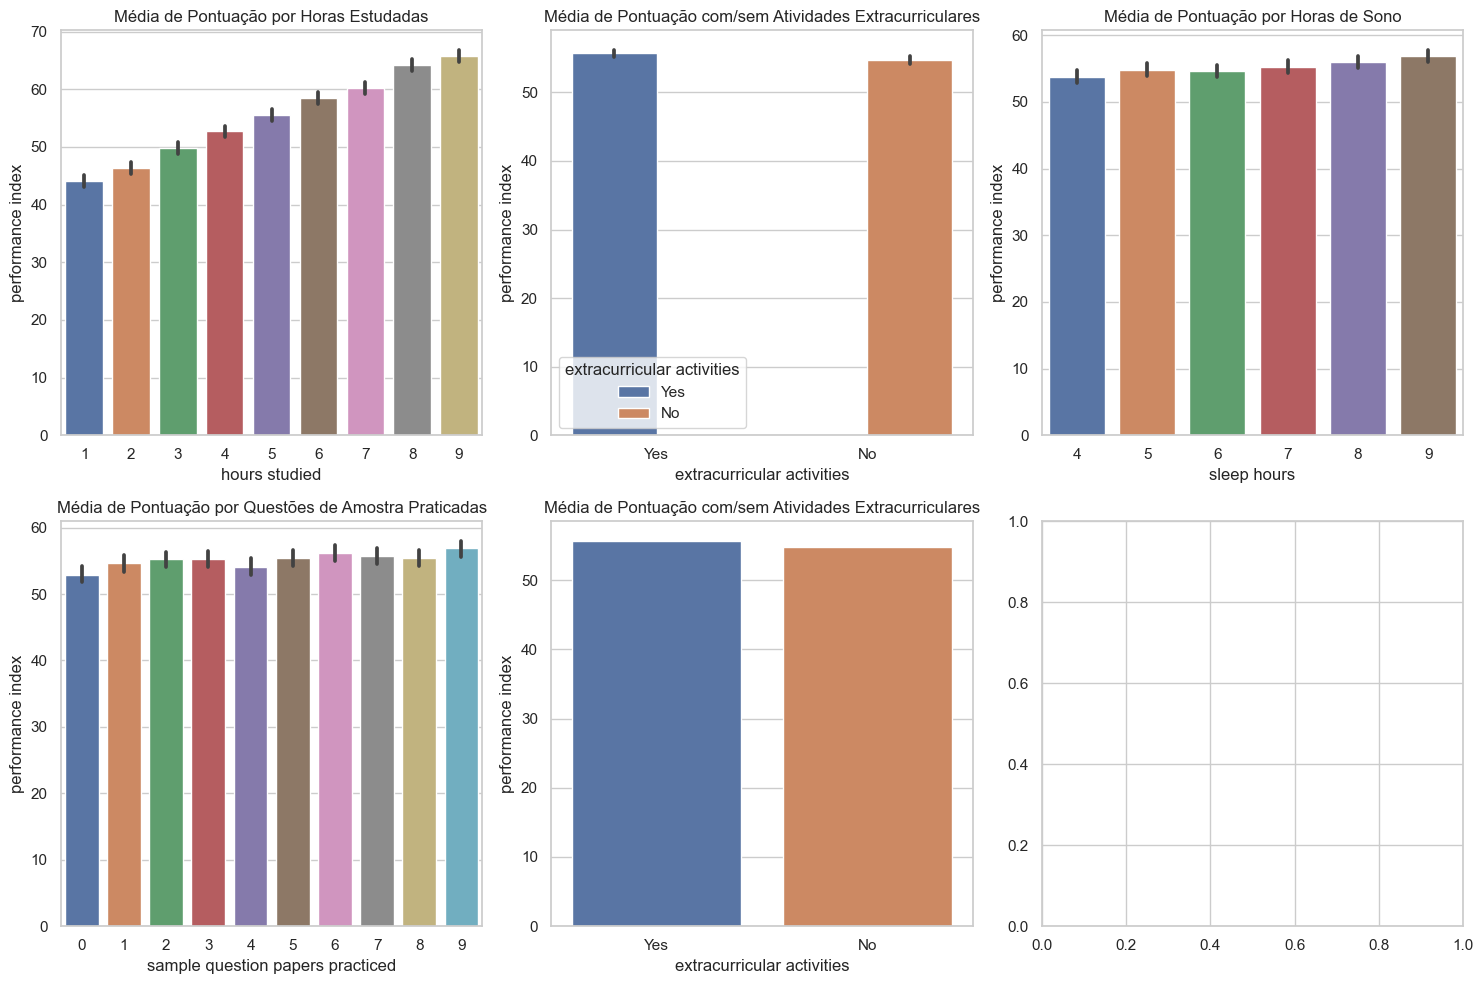

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo para Seaborn
sns.set(style="whitegrid")

# Configuração do tamanho do gráfico
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Gráfico de barras para estudar horas vs pontuação
sns.barplot(x='hours studied', y='performance index', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Média de Pontuação por Horas Estudadas')

# Gráfico de barras para atividades extracurriculares vs pontuação
sns.barplot(x='extracurricular activities', y='performance index', hue='extracurricular activities', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Média de Pontuação com/sem Atividades Extracurriculares')

# Gráfico de barras para horas de sono vs pontuação
sns.barplot(x='sleep hours', y='performance index', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Média de Pontuação por Horas de Sono')

# Gráfico de barras para questões de amostra praticadas vs pontuação
sns.barplot(x='sample question papers practiced', y='performance index', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Média de Pontuação por Questões de Amostra Praticadas')

# Gráfico de barras para comparar pontuações com e sem atividades extracurriculares
sns.barplot(x='extracurricular activities', y='performance index', data=df, ci=None, ax=axes[1, 1])
axes[1, 1].set_title('Média de Pontuação com/sem Atividades Extracurriculares')

# Removendo espaçamento entre os gráficos
plt.tight_layout()

# Exibindo o dashboard
plt.show()


In [32]:
print("Resultados:")
print("Média de Pontuação por Horas Estudadas:")
print(df.groupby('hours studied')['performance index'].mean())
print("\nMédia de Pontuação com/sem Atividades Extracurriculares:")
print(df.groupby('extracurricular activities')['performance index'].mean())
print("\nMédia de Pontuação por Horas de Sono:")
print(df.groupby('sleep hours')['performance index'].mean())
print("\nMédia de Pontuação por Questões de Amostra Praticadas:")
print(df.groupby('sample question papers practiced')['performance index'].mean())
print("\nMédia de Pontuação com/sem Atividades Extracurriculares:")
print(df.groupby('extracurricular activities')['performance index'].mean())

Resultados:
Média de Pontuação por Horas Estudadas:
hours studied
1    44.116319
2    46.428571
3    49.776586
4    52.719816
5    55.516453
6    58.486320
7    60.233835
8    64.211397
9    65.725561
Name: performance index, dtype: float64

Média de Pontuação com/sem Atividades Extracurriculares:
extracurricular activities
No     54.758511
Yes    55.700889
Name: performance index, dtype: float64

Média de Pontuação por Horas de Sono:
sleep hours
4    53.794935
5    54.801370
6    54.660490
7    55.278043
8    55.932373
9    56.811344
Name: performance index, dtype: float64

Média de Pontuação por Questões de Amostra Praticadas:
sample question papers practiced
0    52.946372
1    54.606339
2    55.264516
3    55.257005
4    54.148691
5    55.451362
6    56.147309
7    55.776089
8    55.454191
9    56.880114
Name: performance index, dtype: float64

Média de Pontuação com/sem Atividades Extracurriculares:
extracurricular activities
No     54.758511
Yes    55.700889
Name: performance ind

C:\Users\Leoni\AppData\Local\Temp\ipykernel_6592\1795529111.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



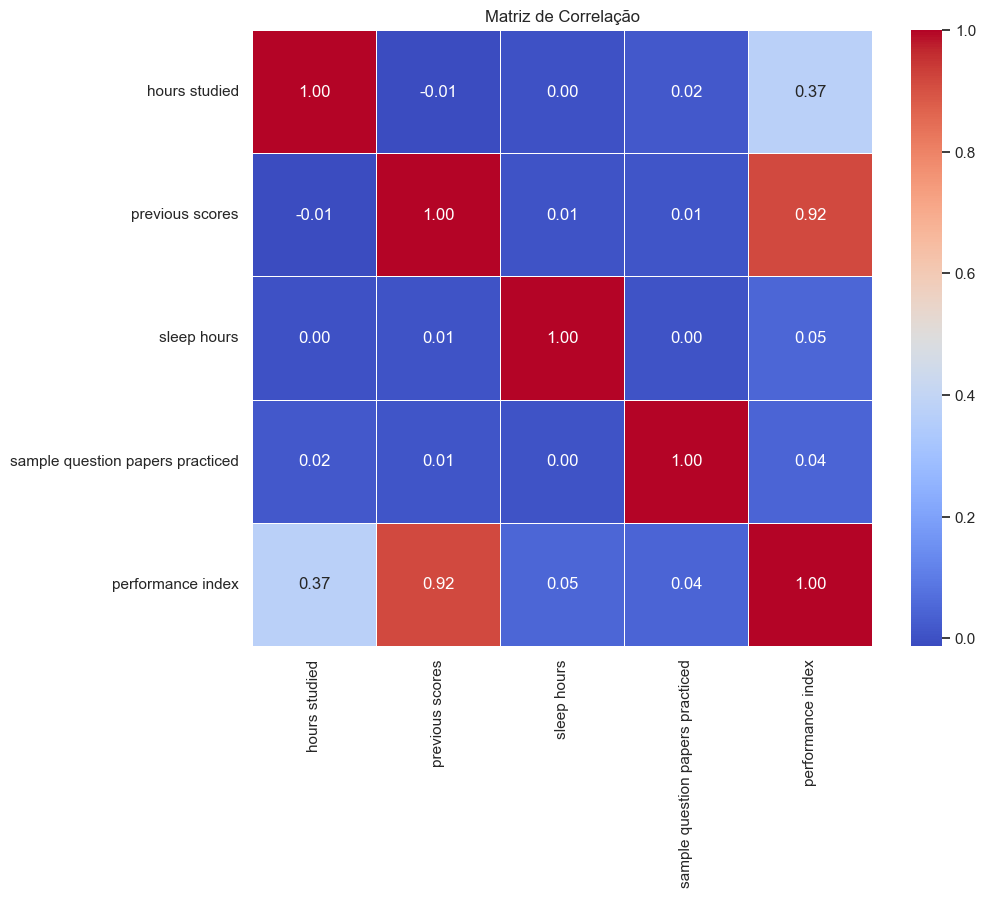

In [33]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Configurando a visualização com Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()


**Média de Pontuação por Horas Estudadas:**

A pontuação média parece aumentar à medida que o número de horas estudadas aumenta. Isso sugere uma correlação positiva entre o tempo de estudo e o desempenho.

**Média de Pontuação com/sem Atividades Extracurriculares:**

A diferença na média de pontuação entre alunos com e sem atividades extracurriculares é relativamente pequena. Isso sugere que a participação em atividades extracurriculares pode ter uma influência moderada no desempenho.

**Média de Pontuação por Horas de Sono:**

Parece não haver uma diferença substancial na pontuação média entre diferentes horas de sono. No entanto, é importante observar que a relação entre sono e desempenho pode ser mais complexa e pode depender de outros fatores.

**Média de Pontuação por Questões de Amostra Praticadas:**

A pontuação média aumenta à medida que mais questões de amostra são praticadas. Isso sugere que a prática de questões de amostra pode estar relacionada a um melhor desempenho.

**Média de Pontuação com/sem Atividades Extracurriculares (Novamente):**

Repetindo a média de pontuação com/sem atividades extracurriculares para enfatizar que a diferença é relativamente pequena.

**Considerações Importantes:**

- **Correlação não implica causalidade:** Embora essas análises revelem correlações entre variáveis, é importante notar que correlação não implica causalidade. Outros fatores não considerados neste conjunto de dados podem influenciar o desempenho dos alunos.

- **Interpretação cuidadosa:** As médias fornecem uma visão geral, mas é crucial interpretar os resultados com cautela. Outliers ou distribuições específicas podem influenciar as médias.

- **Contexto adicional:** Para uma compreensão mais completa, seria útil ter informações adicionais, como o nível de ensino, o tipo de atividades extracurriculares, entre outros.
